In [7]:
from qaoa_and_tdvp import QAOA, tdvp_optimize_qaoa, scipy_optimize, QAOAResult
from MaxCut import MaxCut
from benchmark import get_all_connected, get_connected_rn_graph, get_rn_qubo, select_if_connected, Benchmark
from qutip.parallel import parallel_map, serial_map
from itertools import combinations_with_replacement
from multiprocessing import Value
import pickle
import numpy as np

In [15]:
p = 2
n=4
seed = 42

In [16]:
with open(f"./instances/n{n}_graphs.p","rb") as f:
    graphs = pickle.load(f)

In [33]:
index = np.random.randint(0,len(graphs)); print(index)

5


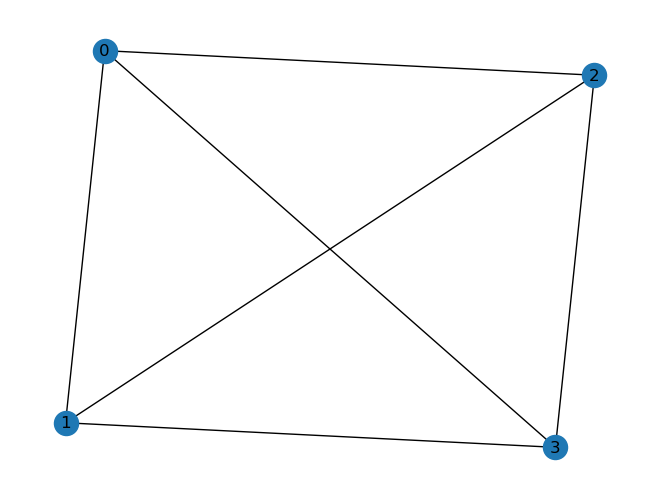

In [35]:
instance = MaxCut(graphs[index])
qaoa = QAOA(qubo=instance.qubo, p=p, mapping=serial_map)
delta = tuple(1 for _ in range(2 * qaoa.p))

In [36]:
res = tdvp_optimize_qaoa(
    qaoa,
    delta,
    .1,
    int_mode="euler",
    rhs_mode="qaoa",
    grad_tol=0.1,
    max_iter=300,
)
print(res)